In [17]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
from cProfile import label
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
%matplotlib inline

In [18]:
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=30)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=30)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    print(bin_edges)
    print(density)
    
    fig = plt.figure(figsize=(20,20))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [19]:

df = pd.read_csv('../data/taxon-exporter.csv', header=0)
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc

taxons = {}
purpose = {}

for index, row in df.iterrows():
    if(row['Taxon'] not in taxons):
        purpose = {}
    
    if(row['Purpose'] == "B"):
        purposeCode = "Breeding"
    if(row['Purpose'] == "E"):
        purposeCode = "Educational"
    if(row['Purpose'] == "G"):
        purposeCode = "Garden"
    if(row['Purpose'] == "H"):
        purposeCode = "Hunting"
    if(row['Purpose'] == "L"):
        purposeCode = "Law"
    if(row['Purpose'] == "M"):
        purposeCode = "Medical"
    if(row['Purpose'] == "R"):
        purposeCode = "Reintroduction to wild"
    if(row['Purpose'] == "P"):
        purposeCode = "Personal"
    if(row['Purpose'] == "Q"):
        purposeCode = "Circus"
    if(row['Purpose'] == "S"):
        purposeCode = "Scientific"
    if(row['Purpose'] == "T"):
        purposeCode = "Commercial"
    if(row['Purpose'] == "Z"):
        purposeCode = "Zoo"
    if(row['Purpose'] == "Unspecified"):
        purposeCode = "Unspecified"
        
    purposeDetails = {purposeCode: "X"}
        
    purpose.update(purposeDetails)
    attributes = {"Purpose": purpose}

    taxons.update({row['Taxon']: row['Taxon']})
    G.add_node(row['Exporter'], **attributes)


df2 = df.drop_duplicates(['Taxon', 'Exporter'])
for i, group in df2.groupby(['Taxon'])['Exporter']: #https://stackoverflow.com/questions/35089255/pandas-reshape-dataframe-to-edge-list-according-to-column-values
    # generate all combinations without replacement 
    # from the group of similar column pairs
    for u, v in itertools.combinations(group, 2):
        if(G.has_edge(u,v)):
            G[u][v]['weight'] += 1
        else:
            G.add_edge(u, v, weight = 1)
            
nx.write_gml(G, "exporter-exporter-taxon.gml")



Number of nodes:  137
Number of edges:  7333

Average degree: 107.05109489051095
Minimum degree:  4
Maximum degree:  136
[   4.            4.89048992    5.97922291    7.31033233    8.93777664
   10.92752663   13.3602397    16.33452938   19.97096281   24.41694806
   29.85270957   36.49859378   44.62400121   54.55830699   66.70421255
   81.55406971   99.70983889  121.90749041  149.04683815  182.22801476
  222.79606716  272.39547997  333.03683701  407.17832329  497.82537106
  608.65248932  744.1522154   909.81722641 1112.36299288 1360.        ]
[0.00819691 0.00670437 0.         0.         0.         0.00600093
 0.         0.         0.         0.         0.00109831 0.00179665
 0.00514328 0.00120193 0.00245769 0.00603054 0.01446855 0.01533045
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


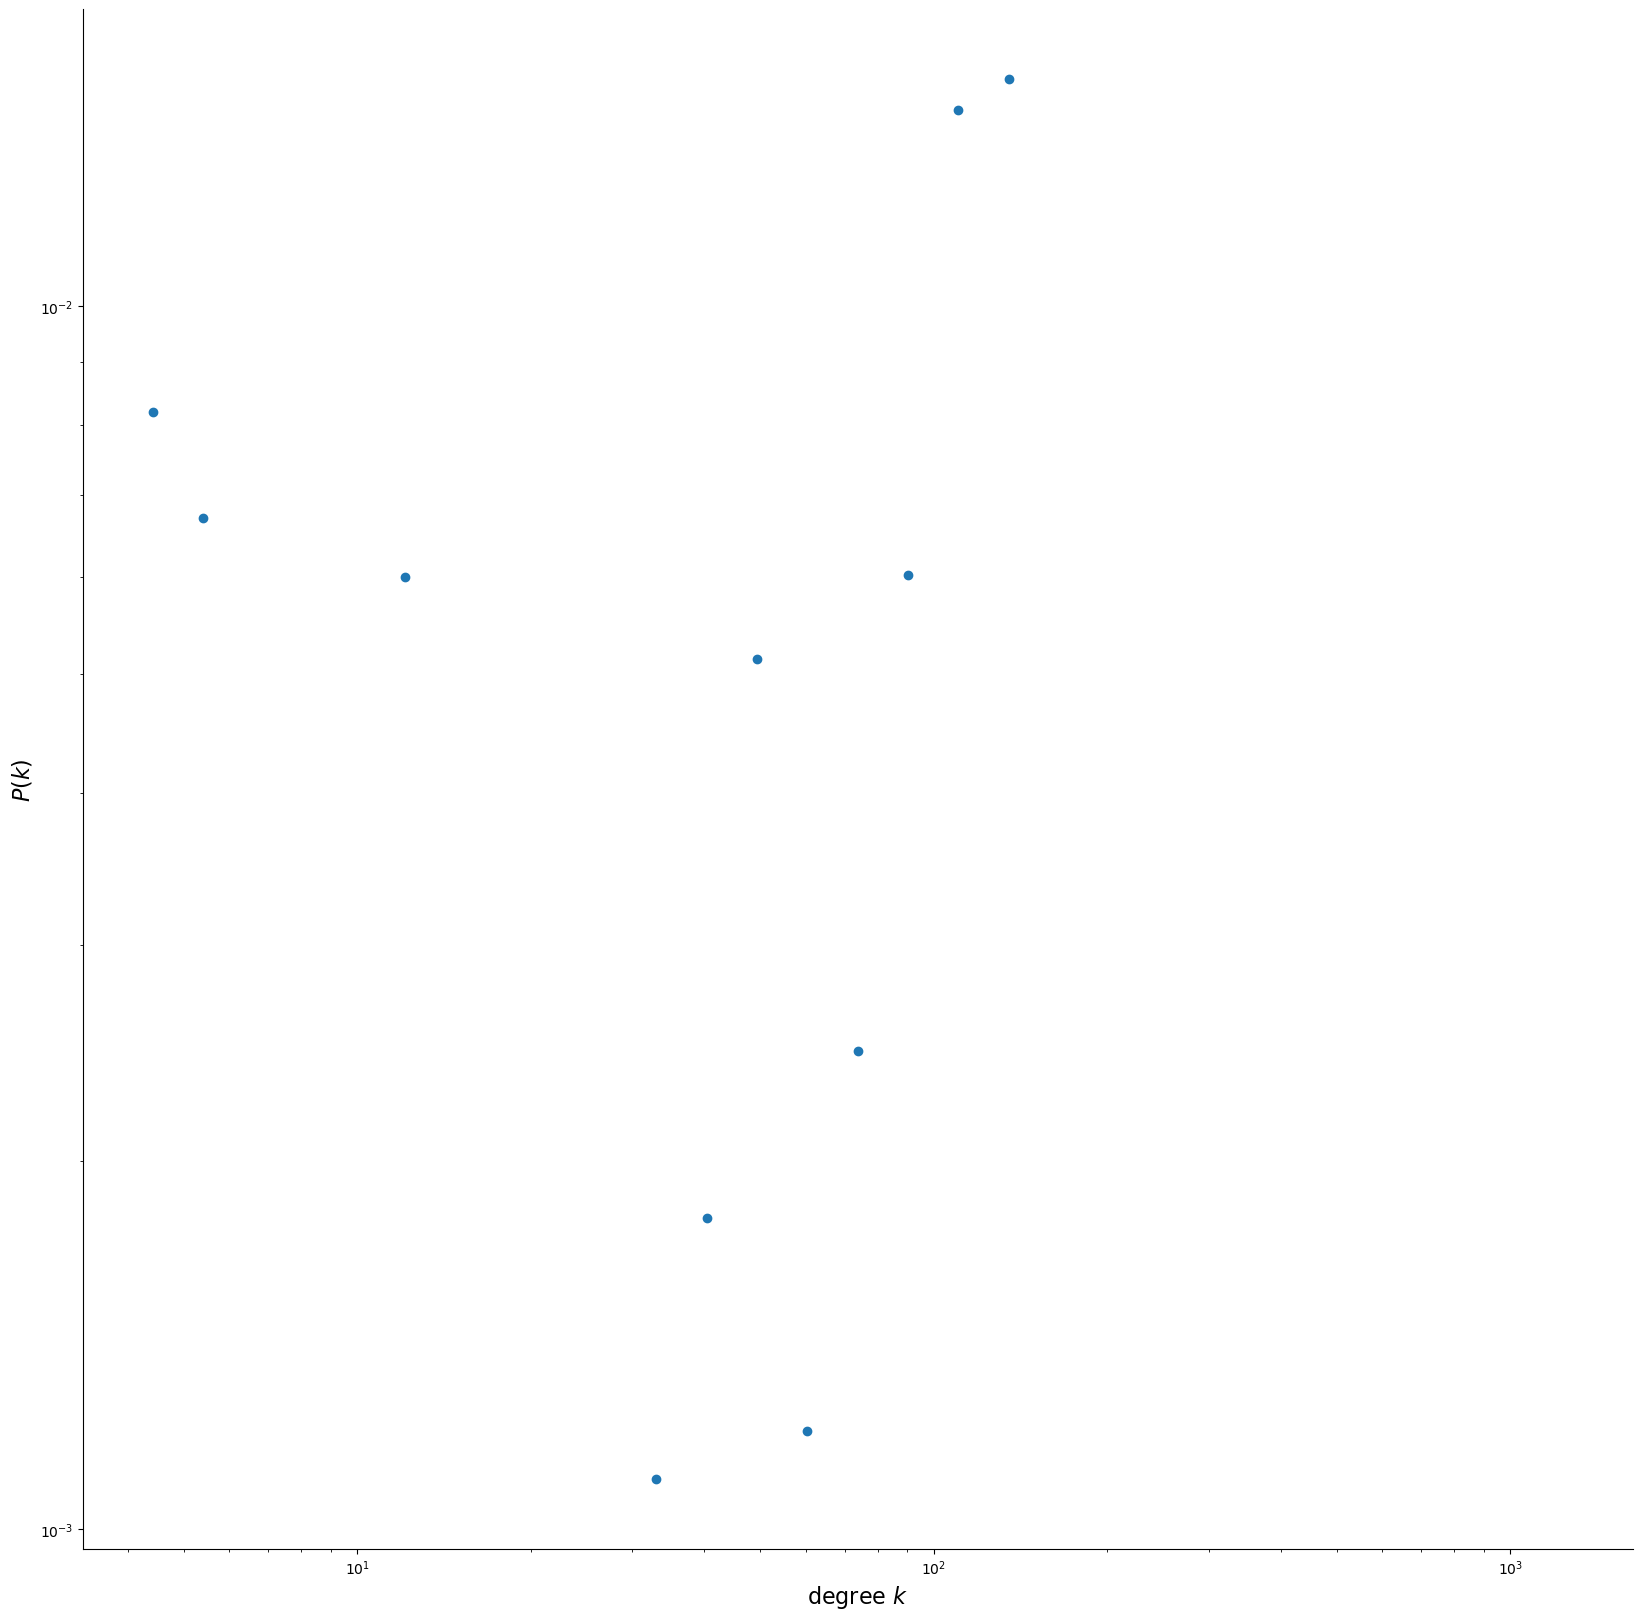

In [20]:
degrees = [G.degree[node] for node in G]
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())
print()
print("Average degree:", np.mean(degrees))
print("Minimum degree: ", min(degrees))
print("Maximum degree: ", max(degrees))

plot_degree_dist(G)